In [42]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans

import tensorflow_datasets as tfds

from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
ds = tfds.load('svhn_cropped', split='train', shuffle_files=False)

['image', 'label']
(32, 32, 3) 4


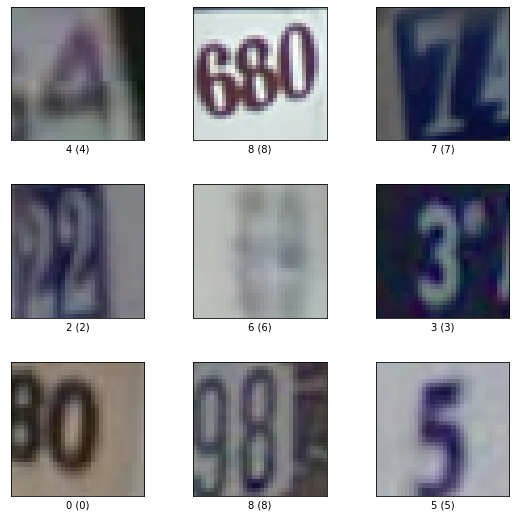

FeaturesDict({
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})


In [12]:
ds = ds.take(1)

for example in tfds.as_numpy(ds):
    print(list(example.keys()))
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

ds, info = tfds.load('svhn_cropped', split='train', with_info=True)
tfds.show_examples(ds, info)
print(info.features)

In [35]:
ds = tfds.load('svhn_cropped', split='train', shuffle_files=False)

dsnp = [example["image"] for example in tfds.as_numpy(ds)]
y = [example["label"] for example in tfds.as_numpy(ds)]

In [48]:
ds_test = tfds.load('svhn_cropped', split='test', shuffle_files=False)

dsnp_test = [example["image"] for example in tfds.as_numpy(ds)]
y_test = [example["label"] for example in tfds.as_numpy(ds)]
y_test = np.array(y_test)

In [28]:
std = np.std(dsnp, axis = 0)


In [27]:
print(np.shape(dsnp))
for i in range(3):
    print("min std = ", np.min(std[:, :, i]))
    print("max std = ", np.max(std[:, :, i]))

(73257, 32, 32, 3)
min std =  45.94055632146634
max std =  53.542886496045334
min std =  46.86959933390931
max std =  54.1431092015319
min std =  47.17698117413908
max std =  52.315425672960416


In [37]:
dsnp_flat = np.array(dsnp)
dsnp_flat = np.reshape(dsnp_flat, (np.shape(dsnp_flat)[0], -1))

dsnp_test_flat = np.array(dsnp_test)
dsnp_test_flat = np.reshape(dsnp_test_flat, (np.shape(dsnp_test_flat)[0], -1))

print(np.shape(dsnp_flat))

kmeans = KMeans(n_clusters=10, random_state=0).fit(dsnp_flat)

(73257, 3072)


In [ ]:
clusters = kmeans.predict(dsnp_test_flat)
labels = np.zeros_like(clusters)

In [49]:
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_test[mask])[0]

[6 8 1 ... 9 8 6]
